In [1]:
import torch
from dataset import load_train_data
from albumentations.augmentations import transforms
from albumentations import Compose
import numpy as np
import matplotlib.pyplot as plt

import constants as cons


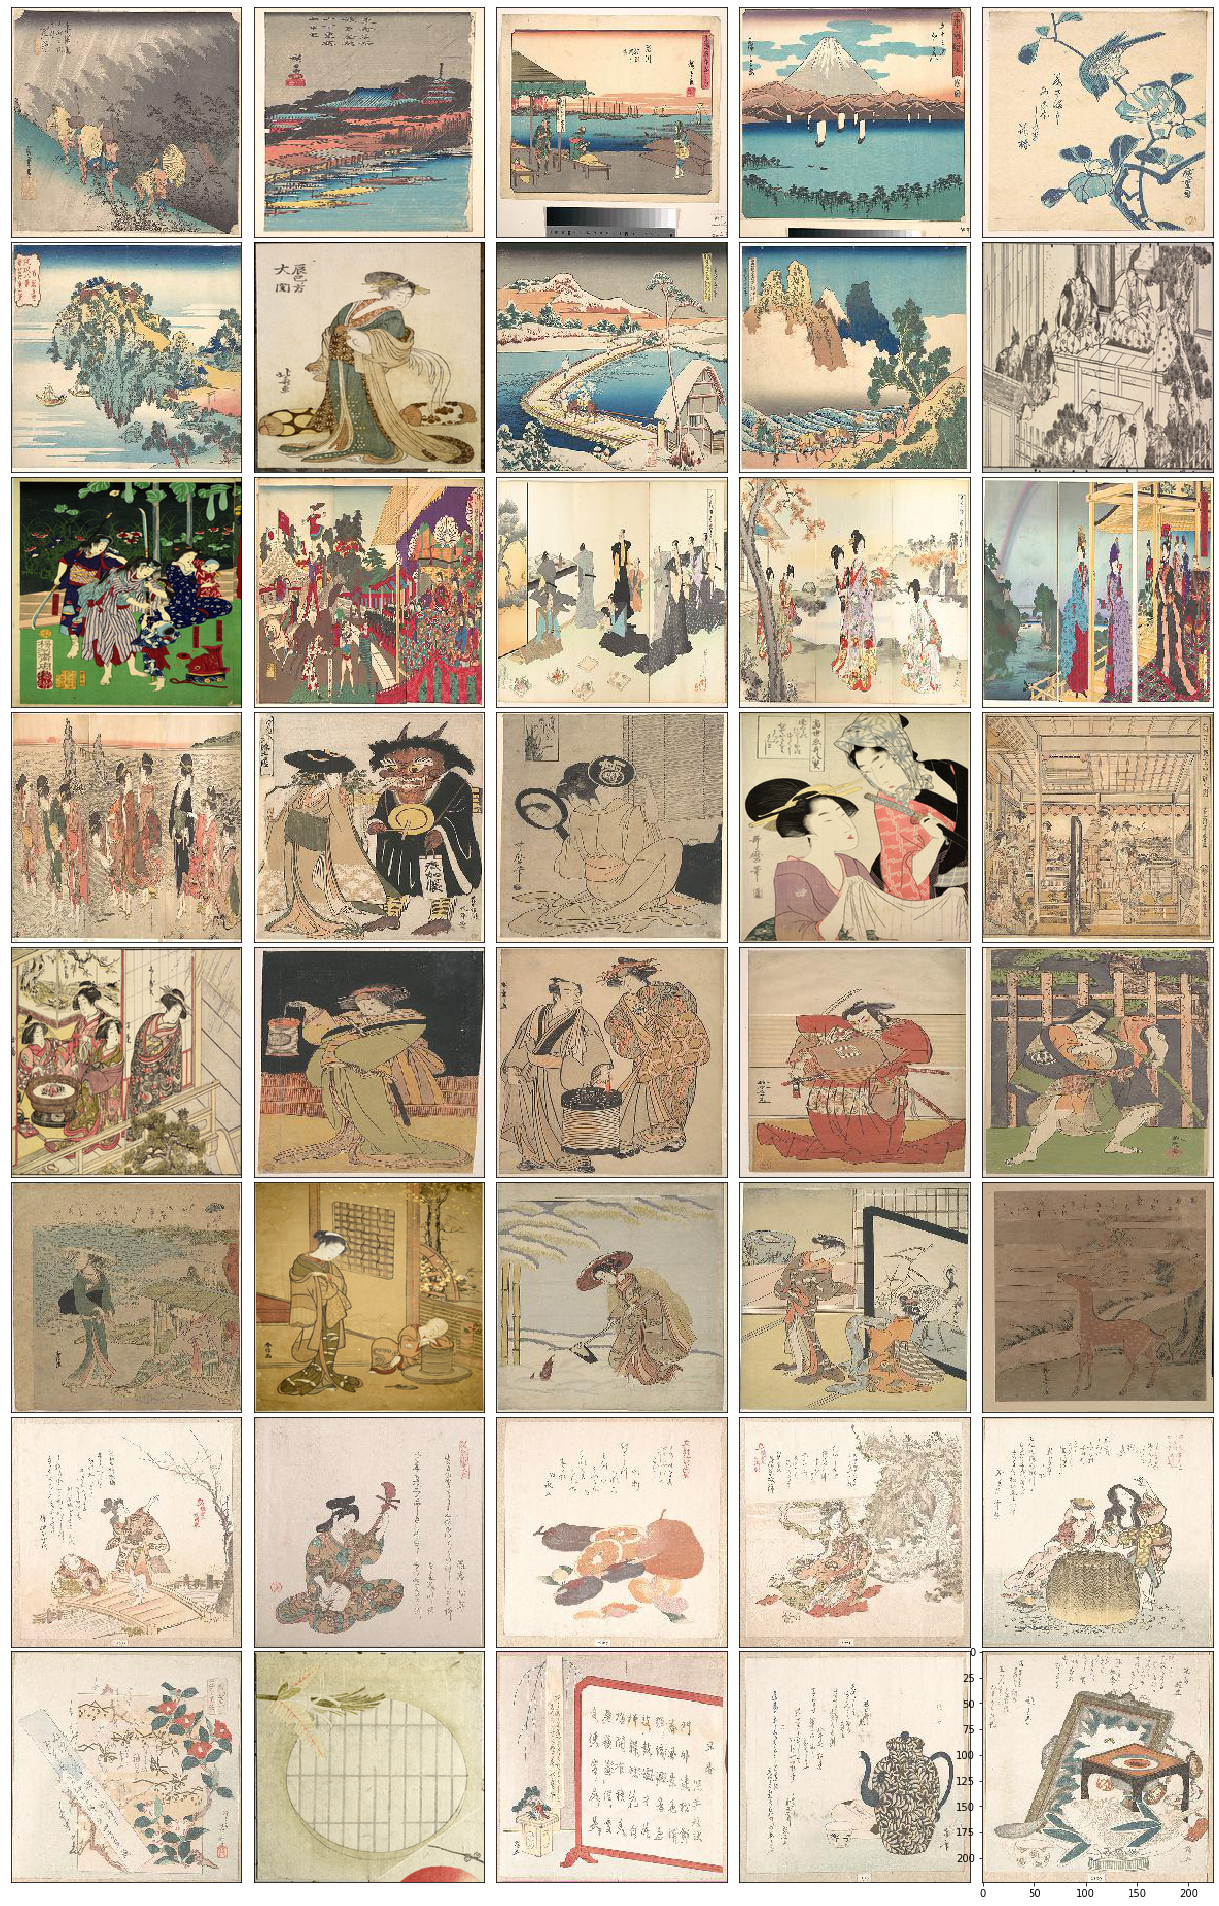

In [3]:
valid = True
nfold = 0

imgs = np.load('data/ukiyoe-train-imgs.npz')['arr_0']
labels = np.load('data/ukiyoe-train-labels.npz')['arr_0']
fold_len = int(len(imgs)/5)

np.random.seed(seed=56)
p = np.random.permutation(len(imgs))
imgs = imgs[p]
labels = labels[p]

if valid is False:
    data_list = np.delete(imgs, slice(fold_len * (nfold), fold_len * (nfold + 1)), axis=0)
    label_list = np.delete(labels, slice(fold_len * (nfold), fold_len * (nfold + 1)), axis=0)
else:
    data_list = imgs[fold_len * (nfold) : fold_len * (nfold + 1)]
    label_list = labels[fold_len * (nfold) : fold_len * (nfold + 1)]
    
target_labels=[0,1,9,4,2,6,3,7]
plot_num=5
m = 3.5
plt.figure(figsize=(plot_num*m,len(target_labels)*m))
plt.subplots_adjust(hspace=0.02,wspace=0.02, top=0.95,bottom=0.02,left=0.02,right=0.98)
for j in range(len(target_labels)):
    target_images = data_list[np.where(label_list==target_labels[j])]
    for i in range(plot_num):
        plt.xticks([])
        plt.yticks([])
        plt.subplot(len(target_labels),plot_num,j*plot_num+i+1)
        plt.imshow(target_images[i])
plt.show()